## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [31]:
import numpy as np

# Входные данные
input_vector = [2, 2, 3, 3, 3, 4, 5]

# Пользуемся генератором списков, чтобы для каждого значения x0, x1 во входном векторе сгенерировать ряд в матрице
print(
    # Используем массив NumPy для вывода информации. Генерируем его из одномерного массива через reshape
    np.array(
        [value ** i for value in input_vector for i in range(len(input_vector))]
    ).reshape(len(input_vector), len(input_vector))
)

[[    1     2     4     8    16    32    64]
 [    1     2     4     8    16    32    64]
 [    1     3     9    27    81   243   729]
 [    1     3     9    27    81   243   729]
 [    1     3     9    27    81   243   729]
 [    1     4    16    64   256  1024  4096]
 [    1     5    25   125   625  3125 15625]]


## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

In [1]:
import numpy as np
import scipy.stats as st
from collections import Counter as cnt
import matplotlib.pyplot as plt


def generate(n, teams=False):
    a = np.random.exponential(1, size=n * 10**4).reshape(10**4, n)
    b = np.random.normal(1, 1, size=n * 10**4).reshape(10**4, n)
    c = np.random.poisson(1, size=n * 10**4).reshape(10**4, n)
    d = st.bernoulli.rvs(p=0.5, size=n * 10**4) * 2
    d = d.reshape(10**4, n)

    if teams:
        a += b
        c += d
        res = np.hstack((a, c)).reshape(10**4, 2, n)
    else:
        res = np.hstack((a, b, c, d)).reshape(10**4, 4, n)
    return res


def prepare(x):
    y = np.argmax(np.sum(x.copy()[..., :], 2)[..., :], 1)
    z = cnt(y)
    return z


def main(n):
    data = prepare(generate(n))
    data = [data[0], data[1], data[2], data[3]]
    fig1, ax1 = plt.subplots()
    names = ['Vinnie', 'Pyatachok', 'Rabbit', 'Donkey']
    ax1.bar(names, data)
    ax1.set_facecolor('white')
    fig1.set_figwidth(4)
    fig1.set_figheight(3)
    plt.show()

    names = ['Vinnie and Pyatachok', 'Rabbit and Donkey']
    data = prepare(generate(n, True))
    data = [data[0], data[1]]
    fig2, ax2 = plt.subplots()
    ax2.bar(names, data)
    ax2.set_facecolor('white')
    fig2.set_figwidth(4)
    fig2.set_figheight(3)
    plt.show()


main(5)

<Figure size 400x300 with 1 Axes>

<Figure size 400x300 with 1 Axes>

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [63]:
import requests
import re
from bs4 import BeautifulSoup
from pandas import DataFrame


def get_sum_from_regex(text):
    regex = re.findall('(\d+)',
                       text.replace(' ', '').replace('\n', '').replace(' ', '').replace('¤', '').replace(' ', ''))
    if regex.__len__() > 0:
        return regex[0]
    else:
        return 0


def parse_page(search, page):
    # Формат поисковой ссылки https://www.avito.ru/moskva?q=газель
    # Пробелы заменяем на символы "+"
    response = requests.get('https://www.avito.ru/moskva?q=' + search.replace(' ', '+'))
    if response.status_code != 200:
        print('Ошибка загрузки страницы, проверьте соединение: ' + str(response.status_code))
        return -1

    # Проверим, нет ли сообщения о том что ничего не найдено
    if response.text.find('Ничего не найдено') != -1:
        print('Ничего не найдено по данному запросу')
        return -1

    page_soup = BeautifulSoup(response.text, 'html.parser')

    # Определим количество страниц в поисковой выдаче, для этого найдем виджет с их переключением
    pages_count = 1
    pagination_widget = page_soup.find('div', {'data-marker': ['pagination-button']})
    if pagination_widget is not None:
        page_widgets = pagination_widget.findAll('span')
        if page_widgets is not None:
            pages_count = int(page_widgets[-2].text)

    # Если поисковая выдача содержит меньше страниц черем параметр "page", то выйдем из процедуры
    if pages_count < page:
        print('Страниц в поисковой выдаче меньше чем переданный параметр')
        return -1

    # Загрузим нужную страницу поиска (если параметр page > 1), если 1, то не надо лишний раз перезагружать страницу
    if page > 1:
        url = 'https://www.avito.ru/moskva?q=' + search.replace(' ', '+') + '&p=' + str(page)
        response = requests.get(url)
        if response.status_code != 200:
            print('Ошибка загрузки страницы по ссылке: ' + url + ' Статус отвтета: ' + str(response.status_code))
            return -1
        page_soup = BeautifulSoup(response.text, 'html.parser')

    # Создадим датафрейм для результата работы
    results_list = []

    # Находим на вновь загруженной странице теги с объявлениями
    products_list = page_soup.findAll('div', {'itemtype': ['http://schema.org/Product']})
    for product in products_list:
        link = ''
        title = ''
        price = 0
        address = ''
        distance = 0

        # Внутри тега с товаром найдем тег с описанием и ссылкой
        description_tag = product.find('a', class_='snippet-link')
        if description_tag is not None:
            if 'href' in description_tag.attrs:
                link = 'https://avito.ru/' + description_tag['href'].strip()
            if 'title' in description_tag.attrs:
                title = description_tag['title'].strip()

        # Найдем тег с ценой
        price_tag = product.find('span', {'data-marker': ['item-price']})
        if price_tag is not None:
            price = get_sum_from_regex(price_tag.text)

        # Найдем станцию метро, район
        address_tag = product.find('span', class_='item-address-georeferences-item__content')
        if address_tag is not None:
            address = address_tag.text.strip()

        # Найдем станцию метро, район
        distance_tag = product.find('span', class_='item-address-georeferences-item__after')
        if distance_tag is not None:
            distance = get_sum_from_regex(distance_tag.text)

        results_list.append(
            {
                'title': title,
                'link': link,
                'price': price,
                'address': address,
                'distance': distance
            }
        )
    return DataFrame(results_list)


df = parse_page('газ', 2)
df


,title,link,price,address,distance
0,"ГАЗ ГАЗель Next, 2016, с пробегом, цена 1 200 ...",https://avito.ru//moskva/avtomobili/gaz_gazel_...,1200000,Марьина Роща,200
1,"ГАЗ Соболь 2217, 2007, с пробегом, цена 265 00...",https://avito.ru//moskva/avtomobili/gaz_sobol_...,265000,Лесопарковая,400
2,"ГАЗ ГАЗель Next, 2016, с пробегом, цена 865 00...",https://avito.ru//moskva/avtomobili/gaz_gazel_...,865000,Лесопарковая,400
3,"ГАЗ ГАЗель 3302, 2015, с пробегом, цена 639 00...",https://avito.ru//moskva/avtomobili/gaz_gazel_...,639000,Тульская,800
4,"ГАЗ Соболь 2752, 2012, с пробегом, цена 270 00...",https://avito.ru//moskva/avtomobili/gaz_sobol_...,270000,Рассказовка,1
5,"ГАЗ Соболь 2752, 2016, с пробегом, цена 350 00...",https://avito.ru//moskva/avtomobili/gaz_sobol_...,350000,Молодежная,2
6,"ГАЗ ГАЗель 33023, 2014, с пробегом, цена 475 0...",https://avito.ru//moskva/avtomobili/gaz_gazel_...,475000,Косино,600
7,"ГАЗ ГАЗель 3302, 2013, с пробегом, цена 440 00...",https://avito.ru//moskva/avtomobili/gaz_gazel_...,440000,Аннино,400
8,"ГАЗ ГАЗель Next, 2016, с пробегом, цена 1 200 ...",https://avito.ru//moskva/avtomobili/gaz_gazel_...,1200000,Марьина Роща,200
9,"ГАЗ Соболь 2752, 2005, с пробегом, цена 175 00...",https://avito.ru//moskva/avtomobili/gaz_sobol_...,175000,Бабушкинская,2


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

Первые 5 наблюдений
   Store       Date  Dept  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1 2010-02-05     1      24924.50      False    A  151315        42.31   
1      1 2010-02-12     1      46039.49       True    A  151315        38.51   
2      1 2010-02-19     1      41595.55      False    A  151315        39.93   
3      1 2010-02-26     1      19403.54      False    A  151315        46.63   
4      1 2010-03-05     1      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211

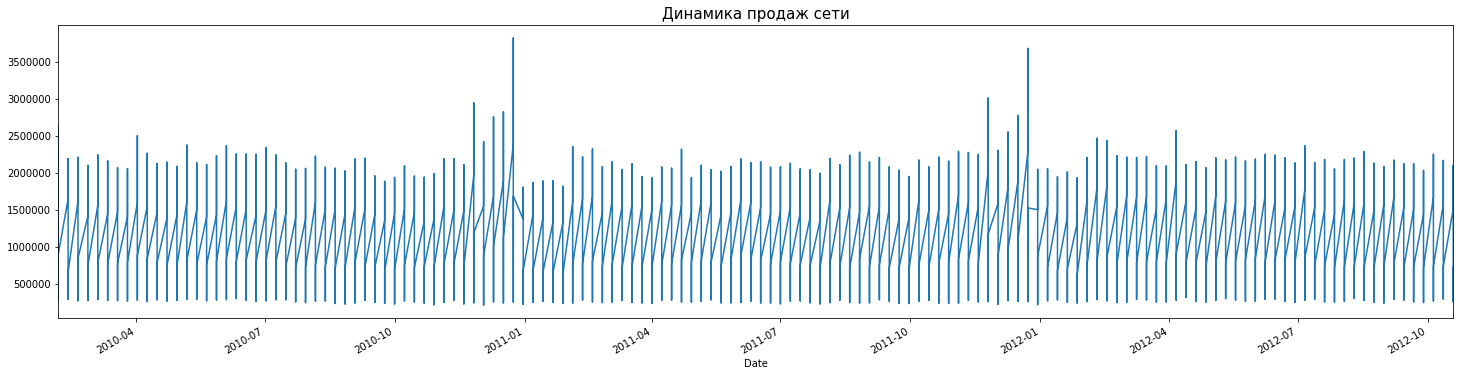

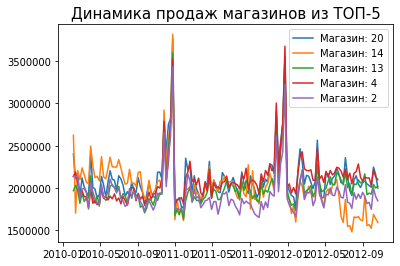

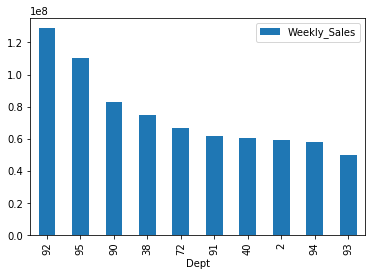

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('walmart.csv', parse_dates=['Date'])

print('\n-----------1------------ \n')
print('Первые 5 наблюдений \n{}\n'.format(df.head(5)))
print('Последние 5 наблюдений \n{}\n'.format(df.tail(5)))
print('------------------------ \n')
print('Кол-во наблюдений = {}\n'.format(df.shape[0]))
print('Кол-во переменных = {}\n'.format(df.shape[1]))
print('------------------------ \n')
print('Наименование и тип переменных: \n{}\n'.format(df.dtypes))

print('\n-----------2------------ \n')
for column in df.columns:
    empty_rows = df.isnull().sum()[column]
    print('Переменная {}, пропущенных значений {}, ({:.2%}) '.format(column, empty_rows, (empty_rows / df.shape[0])))
    if empty_rows / df.shape[0] > 0.6:
        df.drop([column], axis=1)

print('\n-----------3------------ \n')
print('Кол-во магазинов = {}\n'.format(len(list(map(int, df['Store'].unique())))))
print('Кол-во магазинов = {}\n'.format(len(list(map(int, df['Dept'].unique())))))
print('Данные за период = {} дней\n'.format(str(df['Date'].max() - df['Date'].min()).split()[0]))

print('\n-----------4------------ \n')
plt.title('Динамика продаж сети')
sales = df.groupby(['Date', 'Store'], as_index=False).agg({'Weekly_Sales': sum})
sales.set_index('Date')['Weekly_Sales'].plot(figsize=(20,5))
plt.show()

print('\n-----------5------------ \n') 
plt.matshow(df.corr())
plt.show()

print('\n-----------6------------ \n')
plt.title('Динамика продаж магазинов из Топ-5')
top_stores = sales.groupby(['Store'], as_index=False).agg({'Weekly_Sales': sum}).sort_values('Weekly_Sales', ascending=False).head(5)
top_stores_sales = sales.merge(right=top_stores, how='inner', on=['Store'])

for i in top_stores_sales['Store'].value_counts().index:
    newframe = top_stores_sales[top_stores_sales['Store'] == i]
    plt.plot(newframe.Date, newframe.Weekly_Sales_x, label='Магазин №{}'.format(i))
plt.legend()
plt.show()

print('\n-----------7------------ \n')
top_depts = df[(df['Date'] >= '2011-01-01') & (df['Date'] <= '2011-12-31') & (df['Type'] == 'A')]
top_depts.groupby(['Dept'], as_index=False).agg({'Weekly_Sales': sum}).sort_values('Weekly_Sales', ascending=False).head(10).plot(title="Топ-10 отделов 2011 года", kind='bar')
plt.show()

print('\n-----------7------------ \n')
A_depts = df[(df['Date'] >= '2011-01-01') & (df['Date'] <= '2011-12-31') & (df['Type'] == 'A')]
top_depts = A_depts.groupby(['Dept'], as_index=False).agg({'Weekly_Sales': 'sum'}).sort_values('Weekly_Sales', ascending=False).head(5)\
    .plot(title="Топ-10 отделов 2011 года", kind='bar')
plt.show()


## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 